In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


SVC(kernel='linear')

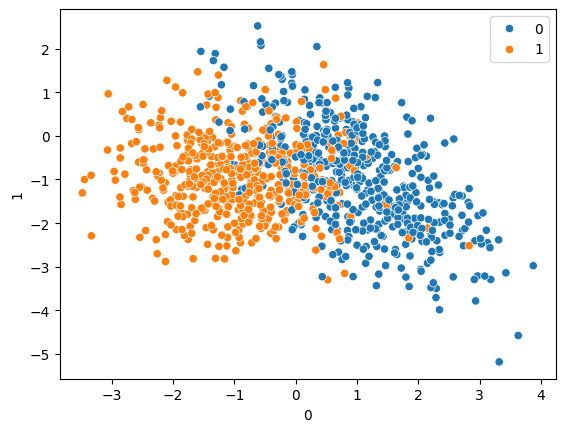

In [61]:
## Lets create synthetic data points
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)
x
y
pd.DataFrame(x)[0]
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y) 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_trian,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)
svc=SVC(kernel='linear')
svc.fit(x_trian,y_train)

In [62]:
svc.coef_

array([[-1.56805516, -0.57259244]])

PREDICTION


In [63]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.87      0.87      0.87       127
           1       0.86      0.86      0.86       123

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

[[110  17]
 [ 17 106]]


RBF KERNAL

In [64]:
rbf=SVC(kernel='rbf')
rbf.fit(x_trian,y_train)
y_pred1=rbf.predict(x_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       127
           1       0.88      0.85      0.86       123

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[112  15]
 [ 18 105]]


POLYNOMIAL

In [65]:
polynomial=SVC(kernel='poly')
polynomial.fit(x_trian,y_train)
y_pred2=polynomial.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85       127
           1       0.97      0.67      0.79       123

    accuracy                           0.83       250
   macro avg       0.86      0.83      0.82       250
weighted avg       0.86      0.83      0.82       250

[[124   3]
 [ 40  83]]


SIGMOID


In [66]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(x_trian,y_train)
y_pred3=sigmoid.predict(x_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       127
           1       0.76      0.72      0.74       123

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250

[[99 28]
 [34 89]]


In [67]:
sigmoid.intercept_,sigmoid

(array([-5.44465336]), SVC(kernel='sigmoid'))

HYPERPARAMETERE TUNING WITH SVC


In [68]:
from sklearn.model_selection import GridSearchCV
## DEFINING PARAMETER RANGE
param_grid = {'C':[0.1, 1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(x_trian,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.780 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

FOR GETTING BEST PARAMS

In [69]:
grid.best_params_

y_pred4=grid.predict(x_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       127
           1       0.86      0.88      0.87       123

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[110  17]
 [ 15 108]]
